In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [43]:
import numpy as np
from functions import CF_loader, splt
import matplotlib.pyplot as plt

savedir = "A07/"

In [3]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

86

In [10]:
filtered_data = loader.filter( data, lambda d : ( d['dep_polymers'] == 'Squared' ) and ( d['defects_frac'] == 0.2 ) )
len( filtered_data )

28

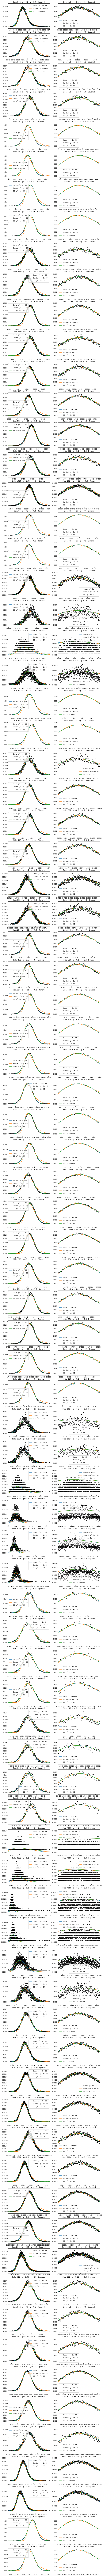

In [75]:
fits, fits_hm = fitter.fits_twocols( data, 0, 0.5, lambda x, h: (x, h), True );

In [3]:
rebinned_fits, rebinned_fits_hm = fitter.fits_twocols( data, 0, 0.5, fitter.rebinner_bywidth( 0.0002 ), False );

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
d:\Dropbox\Gali\Tesi\RSA_problem\Analysis\functions\fitter.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return sum / ( count - 1 )


In [24]:
rebinned_filtered_fits, _ = fitter.fits_twocols( filtered_data, 0, 0.5, fitter.rebinner_bywidth( 0.0001 ), False );

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [4]:
kurtosis = stats.the_kurtosis( data )

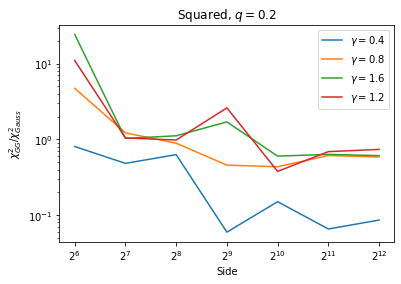

In [44]:
splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['side'],
    lambda d: [
        rebinned_filtered_fits[d]['GG']['chi2'] / rebinned_filtered_fits[d]['Gauss']['chi2'],
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-' }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c:.1f}$" ),
        plt.xscale( 'log', basex = 2 ),
        plt.yscale( 'log', basey = 10 ),
        plt.xlabel( "Side" ),
        plt.ylabel( fr"$\chi^2_{{GG}} / \chi^2_{{Gauss}}$" )
    )
)

plt.savefig( savedir + "chi2ratio.pdf" )

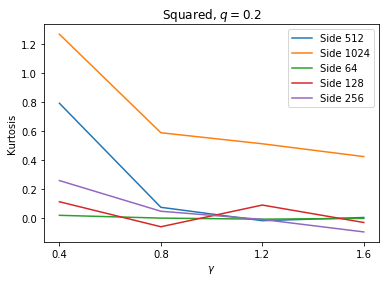

In [50]:
refiltered_data = loader.filter( filtered_data, lambda d : ( d['side'] < 2048 ) )
filtered_data_kurtosis = stats.the_kurtosis( refiltered_data )

splt.iterate(
    len( refiltered_data ),
    lambda d: refiltered_data[d]['dep_polymers'],
    lambda d: refiltered_data[d]['defects_frac'],
    lambda d: refiltered_data[d]['side'],
    lambda d: refiltered_data[d]['gamma'],
    lambda d: [
        filtered_data_kurtosis[d],
    ],
    lambda r, c, l: [
        { 'label': fr"Side {l}" }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c:.1f}$" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'symlog' ),
        plt.xlabel( r"$\gamma$" ),
        plt.ylabel( "Kurtosis" ),
        plt.xticks( [ 0.4, 0.8, 1.2, 1.6 ])
    )
)

plt.savefig( savedir + "kurtosis.pdf" )